In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_links= pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")
df_tags= pd.read_csv("tags.csv")

# Q What is the shape of "movies.csv"?

In [3]:
df_movies.shape

(9742, 3)

# Q What is the shape of "ratings.csv"?

In [4]:
df_ratings.shape

(100836, 4)

# Q How many unique "userId" are available in "ratings.csv"?

In [5]:
len(df_ratings["userId"].unique())

610

# Q Which movie has recieved maximum number of user ratings?

In [6]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
df_movies.merge(df_ratings,on="movieId").groupby("title")\
["rating"].count().reset_index().rename(columns={"rating":"Number of user ratings"})\
.sort_values(by ="Number of user ratings",ascending= False).head(1)

,title,Number of user ratings
3158,Forrest Gump (1994),329


# Q Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [11]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [12]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [13]:
df_merged=df_movies.merge(df_tags,on="movieId")
matrix_tags=df_merged[df_merged["title"]=='Matrix, The (1999)']['tag']

In [14]:
matrix_tags.reset_index()

,index,tag
0,1313,martial arts
1,1314,sci-fi
2,1315,alternate universe
3,1316,philosophy
4,1317,post apocalyptic


# Q What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
merged_df=df_movies.merge(df_ratings,on="movieId")
avg_user_rating=merged_df[merged_df["title"]=="Terminator 2: Judgment Day (1991)"]["rating"].mean()

In [17]:
avg_user_rating

3.970982142857143

# Q How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

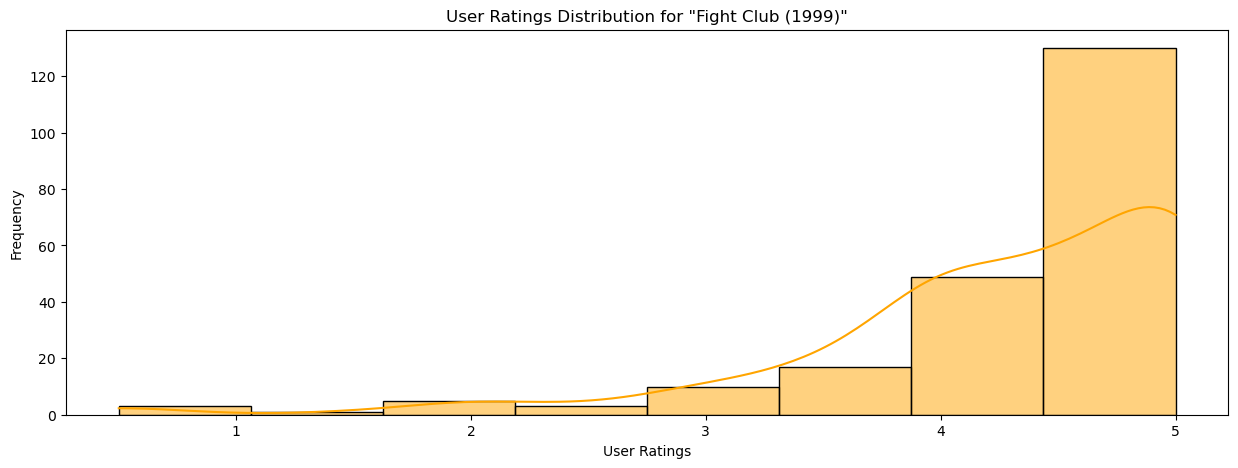

In [18]:
merged_df = df_movies.merge(df_ratings, on='movieId')

fc_ratings = merged_df[merged_df['title'] == 'Fight Club (1999)']['rating']

plt.figure(figsize=(15, 5))
sns.histplot(fc_ratings, bins=8, kde=True, color='orange')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.show()

# mandatory operations:

- Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
- Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
- Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [19]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
df_groupratings = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
df_groupratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [21]:
df_groupratings

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [22]:
df_filter=df_movies.merge(df_groupratings,on="movieId",how="inner")
df_top50=df_filter[df_filter["rating_count"]>50]
df_top50

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Q Which movie is the most popular based on average user ratings?


In [23]:
df_mostpopular_top50 =df_top50.loc[df_top50['rating_mean'].idxmax()]
df_mostpopular_top50.reset_index()

,index,277
0,movieId,318
1,title,"Shawshank Redemption, The (1994)"
2,genres,Crime|Drama
3,rating_count,317
4,rating_mean,4.429022


# Q Select all the correct options which comes under top 5 popular movies based on number of user ratings.


In [26]:
df_top50[df_top50['genres'].str.contains('Sci-Fi')]\
.sort_values(by='rating_count', ascending=False).iloc[2].reset_index()


,index,418
0,movieId,480
1,title,Jurassic Park (1993)
2,genres,Action|Adventure|Sci-Fi|Thriller
3,rating_count,238
4,rating_mean,3.75


# Q Which movie is "most popular" based on the number of STAR ratings?

In [34]:
merged_df = df_top50.merge( df_links[['movieId', 'imdbId']], on='movieId', how='inner')

In [35]:
merged_df

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319
...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381


#  WEB SCRAPPING 

In [27]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    response = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0'})
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
    
    return imdb_rating.text.strip() if imdb_rating else np.nan

In [37]:
for i,row in merged_df.iterrows():
    imdb_id=row["imdbId"]
    imdb_starrating=scrapper(imdb_id)
    merged_df.at[i,"imdb_starrating"]=imdb_starrating
    print(f"IMDb star rating for {imdb_id}: {imdb_starrating}")

IMDb star rating for 114709: 8.3
IMDb star rating for 113497: 7.1
IMDb star rating for 113228: 6.6
IMDb star rating for 113277: 8.3
IMDb star rating for 114319: 6.3
IMDb star rating for 113189: 7.2
IMDb star rating for 112346: 6.8
IMDb star rating for 112641: 8.2
IMDb star rating for 114388: 7.7
IMDb star rating for 112281: 6.4
IMDb star rating for 113161: 6.9
IMDb star rating for 113627: 7.5
IMDb star rating for 114746: 8.0
IMDb star rating for 112431: 6.9
IMDb star rating for 112818: 7.5
IMDb star rating for 112697: 6.9
IMDb star rating for 114369: 8.6
IMDb star rating for 114148: 6.7
IMDb star rating for 114814: 8.5
IMDb star rating for 113862: 7.3
IMDb star rating for 116367: 7.2
IMDb star rating for 115759: 6.1
IMDb star rating for 116483: 7.0
IMDb star rating for 112573: 8.3
IMDb star rating for 75314: 8.2
IMDb star rating for 115685: 7.2
IMDb star rating for 112442: 6.8
IMDb star rating for 112384: 7.7
IMDb star rating for 112462: 5.4
IMDb star rating for 112642: 6.2
IMDb star r

IMDb star rating for 120915: 6.5
IMDb star rating for 78346: 7.4
IMDb star rating for 73629: 7.4
IMDb star rating for 125439: 7.2
IMDb star rating for 145660: 6.6
IMDb star rating for 130827: 7.7
IMDb star rating for 99052: 6.5
IMDb star rating for 158983: 7.7
IMDb star rating for 120891: 4.9
IMDb star rating for 163651: 7.0
IMDb star rating for 185937: 6.5
IMDb star rating for 120663: 7.5
IMDb star rating for 87332: 7.8
IMDb star rating for 167404: 8.2
IMDb star rating for 80339: 7.7
IMDb star rating for 94737: 7.3
IMDb star rating for 85334: 7.9
IMDb star rating for 169547: 8.3
IMDb star rating for 100802: 7.5
IMDb star rating for 91042: 7.8
IMDb star rating for 58150: 7.7
IMDb star rating for 137523: 8.8
IMDb star rating for 93870: 7.6
IMDb star rating for 96438: 7.7
IMDb star rating for 120601: 7.7
IMDb star rating for 94012: 7.1
IMDb star rating for 120655: 7.3
IMDb star rating for 162661: 7.3
IMDb star rating for 120363: 7.9
IMDb star rating for 120689: 8.6
IMDb star rating for 1

In [48]:
df_updatedmerge

,movieId,title_x,genres_x,rating_count,rating_mean,imdbId,imdb_starrating,title_y,genres_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,8.3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,7.1,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,6.6,Grumpier Old Men (1995),Comedy|Romance
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,8.3,Heat (1995),Action|Crime|Thriller
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,6.3,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,8.2,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,8.1,"Grand Budapest Hotel, The (2014)",Comedy|Drama
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,8.7,Interstellar (2014),Sci-Fi|IMAX
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,8.0,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [49]:
df_updatedmerge=merged_df.merge(df_movies,on='movieId',how='inner')

max_starrating=df_updatedmerge["imdb_starrating"].max()

df_updatedmerge[df_updatedmerge["imdb_starrating"]== max_starrating]['movieId'].reset_index()

,index,movieId
0,53,318


# Q.Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [47]:
df_updatedmerge[df_updatedmerge['genres_x'].str.contains('Sci-Fi')].sort_values(by="imdb_starrating",ascending=False).head(1)

,movieId,title_x,genres_x,rating_count,rating_mean,imdbId,imdb_starrating,title_y,genres_y
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,8.8,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
